In [1]:
import numpy as np 
import pandas as pd
import pandas_datareader as dr
import yfinance as yf
from pylab import plot,show
from matplotlib import pyplot as plt
import plotly.express as px
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq
from math import sqrt
from sklearn.cluster import KMeans 
from sklearn import preprocessing

In [20]:
import os
import pandas as pd
from math import sqrt

def calculate_returns_volatility(folder_path):
    data_frames = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):
            file_path = os.path.join(folder_path, file_name)
            company_name = file_name.split(".")[0]
            df = pd.read_csv(file_path)
            
           # column contains the adjusted closing prices
            prices = df['Adj Close']
            
            # Calculate daily returns and volatility
            returns = prices.pct_change()
            volatility = returns.std() * sqrt(252)  # Annualize volatility
            
            # Create a DataFrame with calculated returns and volatility
            returns_df = pd.DataFrame({
                'Company': [company_name],
                'Returns': [returns.mean() * 252],  # Annualize returns
                'Volatility': [volatility]
            })
            
            data_frames.append(returns_df)

    result_df = pd.concat(data_frames, ignore_index=True)
    return result_df

folder_path = r"D:\STOCK MARKET ASSIGNMENT\DATA_ZIP"
returns_dataframe = calculate_returns_volatility(folder_path)
print(returns_dataframe)


   Company   Returns  Volatility
0      AAL  0.166373    0.519460
1     AAPL  0.298745    0.281065
2     ALGT  0.194719    0.389629
3      ALK  0.190931    0.373601
4     AMZN  0.351224    0.315299
5      BCS -0.000205    0.412894
6      BHC  0.120555    0.565864
7       CS -0.053316    0.353569
8      DAL  0.187757    0.404694
9       DB -0.093050    0.420038
10      FB  0.298659    0.373521
11    GOOG  0.205452    0.258203
12      GS  0.071696    0.293570
13      HA  0.195999    0.477901
14     IBM  0.047615    0.223673
15     JNJ  0.132059    0.171342
16     LUV  0.166549    0.324616
17     MRK  0.136884    0.206208
18      MS  0.122756    0.358831
19    MSFT  0.271102    0.254973
20     PFE  0.132287    0.199117
21   RHHBY  0.159895    0.210390
22   SP500  0.122966    0.173574
23     UNH  0.267046    0.260351
24     WFC  0.055801    0.290258


In [17]:
returns_dataframe

,Company,Returns,Volatility
0,AAL,0.166373,0.519460
1,AAPL,0.298745,0.281065
2,ALGT,0.194719,0.389629
3,ALK,0.190931,0.373601
4,AMZN,0.351224,0.315299
5,BCS,-0.000205,0.412894
6,BHC,0.120555,0.565864
7,CS,-0.053316,0.353569
8,DAL,0.187757,0.404694
9,DB,-0.093050,0.420038


C:\Users\Mukul\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mukul\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mukul\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mukul\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarnin

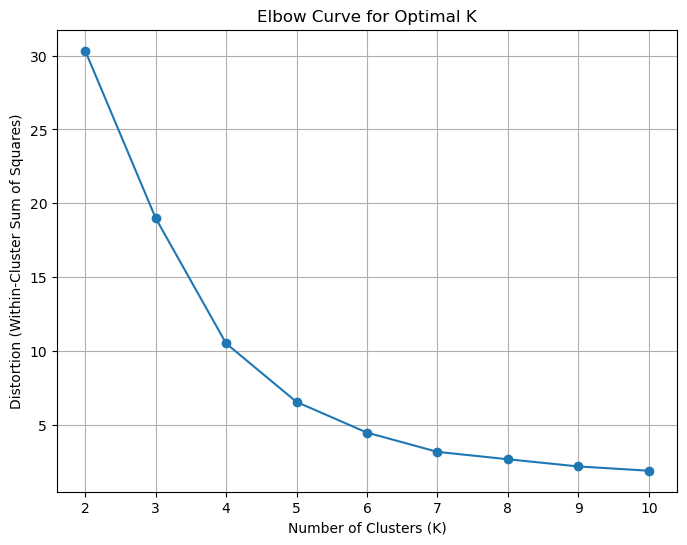

C:\Users\Mukul\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mukul\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


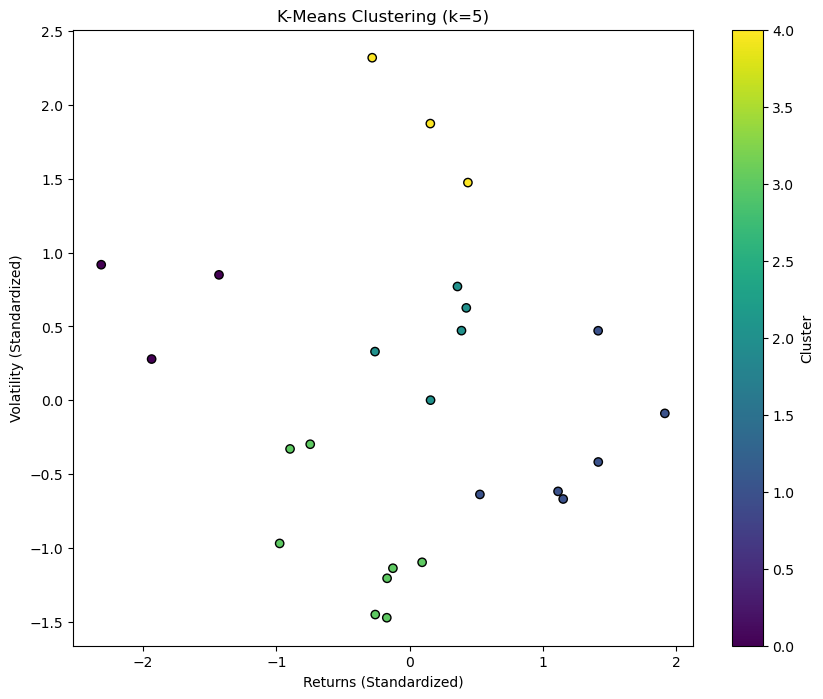

   Company   Returns  Volatility  Cluster
0      AAL  0.166373    0.519460        4
1     AAPL  0.298745    0.281065        1
2     ALGT  0.194719    0.389629        2
3      ALK  0.190931    0.373601        2
4     AMZN  0.351224    0.315299        1
5      BCS -0.000205    0.412894        0
6      BHC  0.120555    0.565864        4
7       CS -0.053316    0.353569        0
8      DAL  0.187757    0.404694        2
9       DB -0.093050    0.420038        0
10      FB  0.298659    0.373521        1
11    GOOG  0.205452    0.258203        1
12      GS  0.071696    0.293570        3
13      HA  0.195999    0.477901        4
14     IBM  0.047615    0.223673        3
15     JNJ  0.132059    0.171342        3
16     LUV  0.166549    0.324616        2
17     MRK  0.136884    0.206208        3
18      MS  0.122756    0.358831        2
19    MSFT  0.271102    0.254973        1
20     PFE  0.132287    0.199117        3
21   RHHBY  0.159895    0.210390        3
22   SP500  0.122966    0.173574  

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# Extract 'Returns' and 'Volatility' columns
data = returns_dataframe[['Returns', 'Volatility']].values

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply K-Means clustering and find the optimal number of clusters (k) using the elbow method
distortions = []
for k in range(2, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), distortions, marker='o')
plt.title('Elbow Curve for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# Choose the optimal number of clusters based on the Elbow Curve
optimal_k = 5  # Adjust based on the visual inspection of the elbow plot

# Apply K-Means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original DataFrame
returns_dataframe['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='black')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.xlabel('Returns (Standardized)')
plt.ylabel('Volatility (Standardized)')
plt.colorbar(label='Cluster')
plt.show()

# Display the DataFrame with cluster labels
print(returns_dataframe)
